In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Ting/OneDrive/Desktop/Spring2021/ECS171/Project/heart.csv')

In [3]:
# some notes about the attributes:
#
# *The labeling of multiple categorical attrubutes from the UCI website is different from the Kaggle website
# *there are: cp, slope, and thal
#
# Categorical Factors:
# age: age in years
# sex: (1 = male; 0 = female)
# cp: chest pain type, (1: typical angina; 
#                       2: atypical angina; 
#                       3: non-anginal pain; 
#                       4: asymptomatic)    #0,1,2,3?
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# restecg: resting electrocardiographic results, 
#         (0: normal, 
#          1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#          2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
# exang: exercise induced angina (1 = yes; 0 = no)
# slope: the slope of the peak exercise ST segment
#       (1: upsloping
#        2: flat
#        3: downsloping)    #0,1,2?
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    #1,2,3?
#
# Numeric Factors:
# age: age in years
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# chol: serum cholestoral in mg/dl
# thalach: maximum heart rate achieved
# oldpeak: ST depression induced by exercise relative to rest
# 
# Dependent Variable:
# target: diagnosis of heart disease (angiographic disease status)
#        (0: < 50% diameter narrowing
#         1: > 50% diameter narrowing)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.info()  ##turns out no NaN values, but still need to check for other invalid values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Cleaning

In [33]:
# a function to detect invalid entries
# takes a row in the dataframe
# returns a boolean variable, True for valid data, False for invalid data
# it could print a better explained message, but I think the short version is fine for now.
def CheckValid(row):
    #first check numeric variables
    if row['age'] < 0 :
        print('invalid1')
        return False
    elif row['trestbps'] < 0:
        print('invalid2')
        return False
    elif row['chol'] < 0:
        print('invalid3')
        return False
    elif row['thalach'] < 0:
        print('invalid4')
        return False
    elif row['oldpeak'] < 0:
        print('invalid5')
        return False
    #then check categorical variables
    elif row['sex'] not in [0,1]:
        print('invalid6')
        return False
    elif row['cp'] not in [0,1,2,3]:
        print('invalid7')
        return False
    elif row['fbs'] not in [0,1]:
        print('invalid8')
        return False
    elif row['restecg'] not in [0,1,2]:
        print('invalid9')
        return False
    elif row['exang'] not in [0,1]:
        print('invalid10')
        return False
    elif row['slope'] not in [0,1,2]:
        print('invalid11')
        return False
    elif row['ca'] not in [0,1,2,3]:
        print('invalid12')
        return False
    elif row['thal'] not in [1,2,3]:
        print('invalid13')
        return False
    elif row['target'] not in [0,1]:
        print('invalid14')
        return False
        
    return True


In [34]:
remove_list = []

#traverse rows in dataframe to check if valid
for i in range(len(df)):
    if not CheckValid(df.loc[i]):
        remove_list.append(i)
        
print(remove_list)

invalid13
invalid12
invalid12
invalid12
invalid12
invalid12
invalid13
[48, 92, 158, 163, 164, 251, 281]


In [39]:
print(df.loc[48]['thal'])
print(df.loc[92]['ca'])
print(df.loc[158]['ca'])
print(df.loc[163]['ca'])
print(df.loc[164]['ca'])
print(df.loc[251]['ca'])
print(df.loc[281]['thal'])

0.0
4.0
4.0
4.0
4.0
4.0
0.0


In [43]:
# remove invalid datas
df_cleaned = df.drop(remove_list)

In [44]:
df_cleaned   # 296 valid data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Basic EDA

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

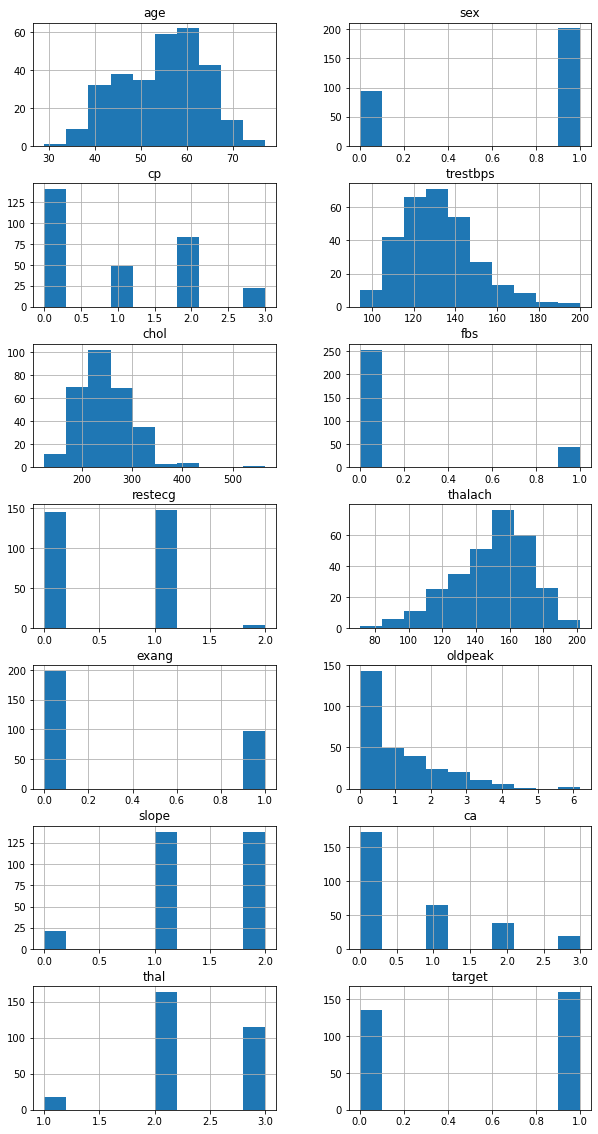

In [48]:
df_cleaned.hist(figsize=(10,20), layout=(7,2))

<AxesSubplot:>

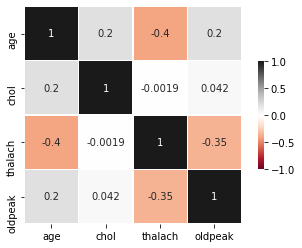

In [50]:
# correlation matrix for numeric variables
sns.heatmap(df_cleaned[['age','chol','thalach','oldpeak']].corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='RdGy',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### thalach is slightly negatively correlated with age, but since it's less than 0.5, I would say it's not a problem
#### I recall from my stats class that correlation coeefecent less than 0.5 is not considered a problem,
#### but it also depends on the field of the data, in our case, medical
#### I'm not sure what is the standard